In [14]:
# for saving model
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [15]:
data = pd.read_csv(r"Traffic.csv")
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
2972,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
2973,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
2974,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [16]:
data[data["Traffic Situation"] == "high"].describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,16.451713,82.853583,16.183801,22.841121,20.554517,142.433022
std,8.920044,18.641362,6.387526,10.319717,10.418028,16.947051
min,1.000000,32.000000,1.000000,3.000000,0.000000,112.000000
25%,8.000000,69.000000,12.000000,14.000000,11.000000,128.000000
50%,17.000000,83.000000,16.000000,19.000000,23.000000,145.000000
75%,24.000000,99.000000,21.000000,32.000000,29.000000,158.000000
max,31.000000,126.000000,30.000000,48.000000,35.000000,166.000000


Data is good:
- No null
- No duplicate

## Prepare data for predictoin

In [17]:
x = data.drop(['Time', 'Traffic Situation', 'Date', 'Day of the week'], axis=1)
y = data['Traffic Situation']
y

0          low
1          low
2          low
3          low
4       normal
         ...  
2971    normal
2972    normal
2973    normal
2974    normal
2975    normal
Name: Traffic Situation, Length: 2976, dtype: object

In [18]:
le = LabelEncoder()
for col in x.select_dtypes('object').columns:
    x[col] = le.fit_transform(x[col])
    
x.head()

,CarCount,BikeCount,BusCount,TruckCount,Total
0,31,0,4,4,39
1,49,0,3,3,55
2,46,0,3,6,55
3,51,0,2,5,58
4,57,6,15,16,94


In [19]:
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 3, 3, 3])

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42, test_size=0.2)

## Models 

In [21]:
models = {
    'Linear_Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    # 'XGB': XGBRegressor(),
    'SVM': SVC()
}

results = {'Model': [], 'Accuracy': [],
           'Precision': [], 'Recall': [], 'F1-Score': []}

In [22]:
for label, model in models.items():
    obj = model
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

    accuracy = accuracy_score(y_test, obj_pred > 0.5)
    precision = precision_score(y_test, obj_pred > 0.5, average='weighted')
    recall = recall_score(y_test, obj_pred > 0.5, average='weighted')
    f1 = f1_score(y_test, obj_pred > 0.5, average='weighted')

    results['Model'].append(label)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)
print(results_df)

               Model  Accuracy  Precision    Recall  F1-Score
0  Linear_Regression  0.196309   0.217809  0.196309  0.147844
1                KNN  0.305369   0.221746  0.305369  0.229018
2       DecisionTree  0.318792   0.227286  0.318792  0.238123
3       RandomForest  0.318792   0.227286  0.318792  0.238123
4                SVM  0.308725   0.203849  0.308725  0.224513


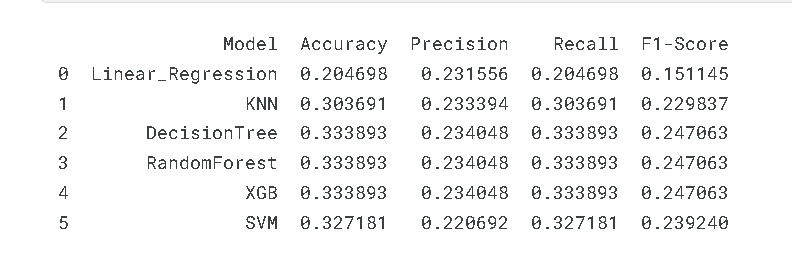

## GridCV

- Note: look at the binary file instead

In [23]:
# svm_model = SVC()
# params = {
#     'kernel': ['poly', 'rbf', 'linear'],
#     'C': [0.1, 10, 100]
# }
# grid = GridSearchCV(svm_model, params, cv=5)
# grid.fit(x_train, y_train)

In [24]:
# with open("traffic_prediction_dapassignment","wb") as file:
#     pickle.dump(grid, file)

In [25]:
with open("traffic_prediction_dapassignment", "rb") as file:
    grid:GridSearchCV = pickle.load(file)
    
grid.best_params_

print('grid best params=', grid.best_params_)
print('grid best score =', grid.best_score_)

y_pred = grid.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

grid best params= {'C': 100, 'kernel': 'rbf'}
grid best score = 0.9571428571428571
Accuracy: 0.9530201342281879
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       127
           1       0.85      0.89      0.87        63
           2       0.94      0.94      0.94        66
           3       0.97      0.95      0.96       340

    accuracy                           0.95       596
   macro avg       0.93      0.94      0.94       596
weighted avg       0.95      0.95      0.95       596



## See what is encoded

In [26]:
key = data["Traffic Situation"].unique()
value =  le.fit_transform(key)

{k:v for(k,v) in zip(key, value)}

{'low': 2, 'normal': 3, 'heavy': 0, 'high': 1}